In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

def process_logfinal(path):
    sample_name = path.split('/')[-2]
    relevant_rows = [0,1,2,4,8,23,25,28,30,32]
    df = pd.read_table(path, header = None)
    df[0] = df[0].map(lambda x: x.strip('|'))
    total_duration = pd.to_datetime('2023 ' + df.iloc[:3][1], format="%Y %b %d %X")[2]-pd.to_datetime('2023 ' + df.iloc[:3][1], format="%Y %b %d %X")[0]
    mapping_duration = pd.to_datetime('2023 ' + df.iloc[:3][1], format="%Y %b %d %X")[1]-pd.to_datetime('2023 ' + df.iloc[:3][1], format="%Y %b %d %X")[0]
    df_duration = pd.DataFrame({0:['Total duration', 'Mapping duration'], 1:[total_duration, mapping_duration]})
    df_final = pd.concat([df_duration, df.iloc[relevant_rows]])
    df_final = df_final.set_index(0).T.reset_index(drop=True)
    df_final = pd.concat([pd.DataFrame({'Sample name': [sample_name]}),df_final], axis = 1)
    return df_final

def preprocess():
    sample_types = ['npc_tt', 'npc_cl', 'hn_tt', 'hn_cl']
    sj_filter_type = ['raw','filtered', 'pc_raw', 'pc_filtered']
    
    names = []
    dfs = []
    
    for st in sample_types:
        for sjt in sj_filter_type:
            names.append(f'{st}_{sjt}')
            df = pd.concat([process_logfinal(logfinal) for logfinal in glob.glob(f'alignment_results/{st}/{sjt}/**/**/*.final.out')])
            dfs.append(df)
    for df in dfs:
        df.set_axis([x.strip() for x in df.columns], axis=1,inplace=True)
        
    return dict(zip(names,dfs))

def chunks(lst, n):

    return [lst[i::n] for i in range(n)] 

def plot_percent_reads(col):

    means = [round(df[col].map(lambda x: x.strip('%')).astype(float).mean(), 1) for df in all_dfs.values()]
    std = [round(df[col].map(lambda x: x.strip('%')).astype(float).std(), 1) for df in all_dfs.values()]

    sample_type = ['NPC tumour', 'NPC cell line', 'HN tumour', 'HN cell line']
    x_pos = np.arange(len(sample_type))
    
    raw_md, filt_md, pcraw_md, pcfilt_md = chunks(means, 4)
    raw_std, filt_std, pcraw_std, pcfilt_std = chunks(std, 4)

    plt.bar(x_pos - 0.3, raw_md, width = 0.2, yerr=raw_std,
        align='center', alpha=0.5, ecolor='black', capsize=10)
    plt.bar(x_pos - 0.1, filt_md, width = 0.2, yerr=filt_std,
        align='center', alpha=0.5, ecolor='black', capsize=10)
    plt.bar(x_pos  + 0.1, pcraw_md, width = 0.2, yerr=pcraw_std,
        align='center', alpha=0.5, ecolor='black', capsize=10)
    plt.bar(x_pos + 0.3, pcfilt_md, width = 0.2, yerr=pcfilt_std,
        align='center', alpha=0.5, ecolor='black', capsize=10)
    plt.title(f'{col}')
    plt.ylabel(f'{col}')
    plt.xticks(x_pos, labels = sample_type)
    plt.grid(axis = 'y')
    plt.legend(['Raw', 'Filtered', 'Portcullis raw', 'Portcullis filtered'])

    plt.tight_layout()
    plt.show()



def plot_durations(col):
    
    total_duration_means = [round(df[col].mean().total_seconds()/60, 0) for df in all_dfs.values()]
    total_duration_std = [round(df[col].std().total_seconds()/60, 0) for df in all_dfs.values()]

    sample_type = ['NPC tumour', 'NPC cell line', 'HN tumour', 'HN cell line']
    x_pos = np.arange(len(sample_type))
    
    raw_md, filt_md, pcraw_md, pcfilt_md = chunks(total_duration_means, 4)
    raw_std, filt_std, pcraw_std, pcfilt_std = chunks(total_duration_std, 4)

    plt.bar(x_pos - 0.3, raw_md, width = 0.2, yerr=raw_std,
        align='center', alpha=0.5, ecolor='black', capsize=10)
    plt.bar(x_pos - 0.1, filt_md, width = 0.2, yerr=filt_std,
        align='center', alpha=0.5, ecolor='black', capsize=10)
    plt.bar(x_pos  + 0.1, pcraw_md, width = 0.2, yerr=pcraw_std,
        align='center', alpha=0.5, ecolor='black', capsize=10)
    plt.bar(x_pos + 0.3, pcfilt_md, width = 0.2, yerr=pcfilt_std,
        align='center', alpha=0.5, ecolor='black', capsize=10)
    plt.title(f'{col}')
    plt.ylabel('Total runtime (minutes)')
    plt.xticks(x_pos, labels = sample_type)
    plt.grid(axis = 'y')
    plt.legend(['Raw', 'Filtered', 'Portcullis raw', 'Portcullis filtered'])

    plt.tight_layout()
    plt.show()
    
    return raw_md, filt_md

def calculate_percentage_difference(list1, list2):
    if len(list1) != len(list2):
        raise ValueError("Input lists must be of equal length.")
    
    percentage_differences = []
    
    for i in range(len(list1)):
        element1 = list1[i]
        element2 = list2[i]
        
        if element1 == 0:
            percentage_diff = (element2 - element1) / 1.0  # Handle division by zero
        else:
            percentage_diff = ((element2 - element1) / element1) * 100.0
        
        percentage_differences.append(percentage_diff)
    
    return percentage_differences

In [2]:
all_dfs = preprocess()

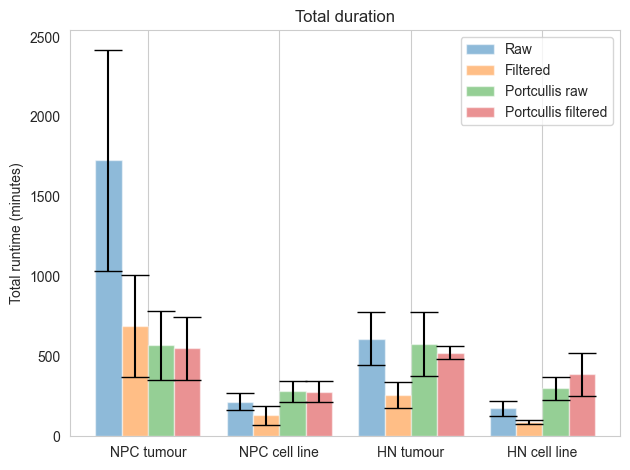

In [3]:
raw,fil = plot_durations('Total duration')

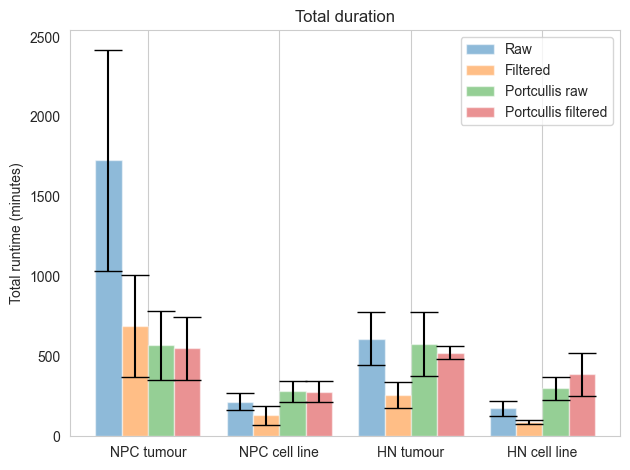

([1727.0, 216.0, 612.0, 174.0], [692.0, 131.0, 260.0, 89.0])

In [4]:
plot_durations('Total duration')

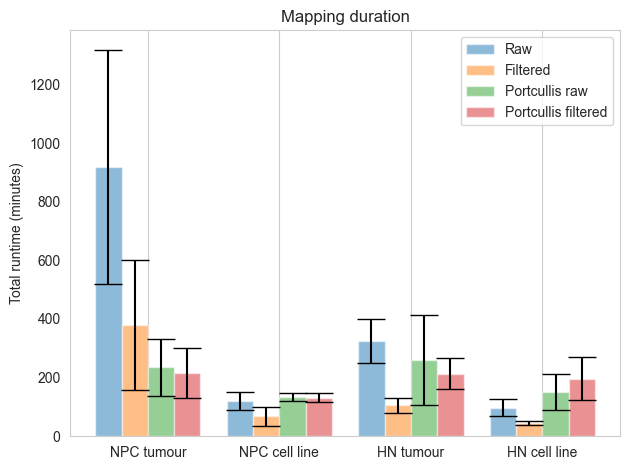

([918.0, 119.0, 324.0, 98.0], [380.0, 68.0, 105.0, 44.0])

In [5]:
plot_durations('Mapping duration')

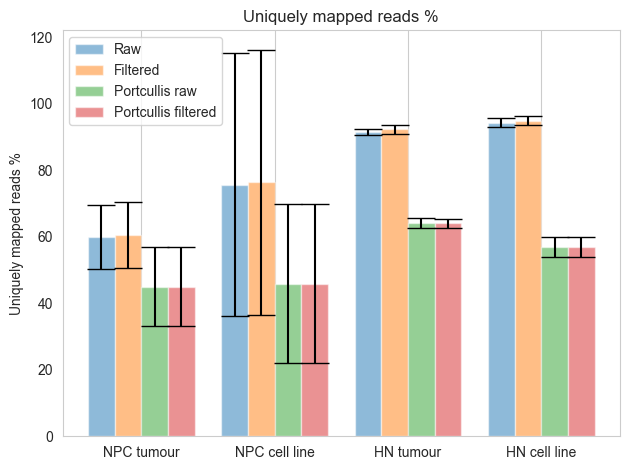

In [6]:
plot_percent_reads('Uniquely mapped reads %')

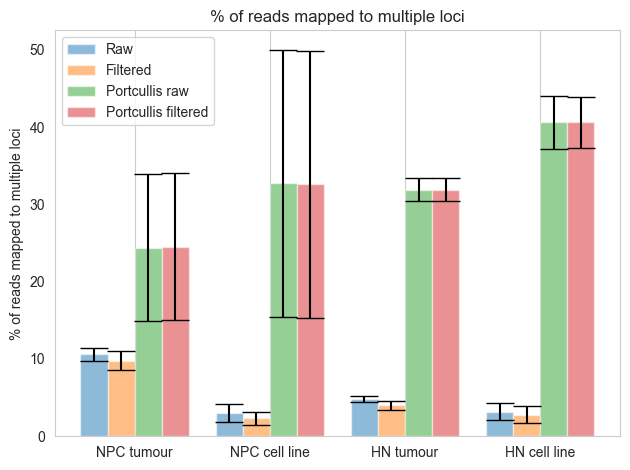

In [7]:
plot_percent_reads('% of reads mapped to multiple loci')

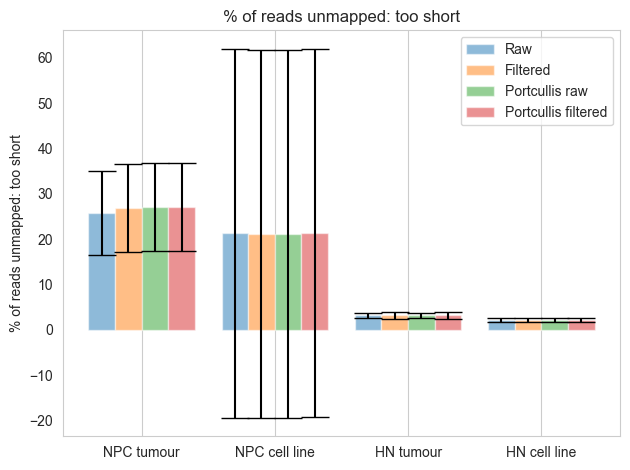

In [8]:
plot_percent_reads('% of reads unmapped: too short')

In [9]:
np.mean(calculate_percentage_difference(raw,fil))

-51.41232044457617